In [ ]:
# wkt : 42 menit
# forgot : 
# improve : - 
# dataset = cancer

In [141]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

In [142]:
# 1. load data

data = pd.read_csv('Breast_Cancer_Classification.csv')

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [144]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [145]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [146]:
data.describe(include='object')

,diagnosis
count,569
unique,2
top,B
freq,357


### 2. EDA

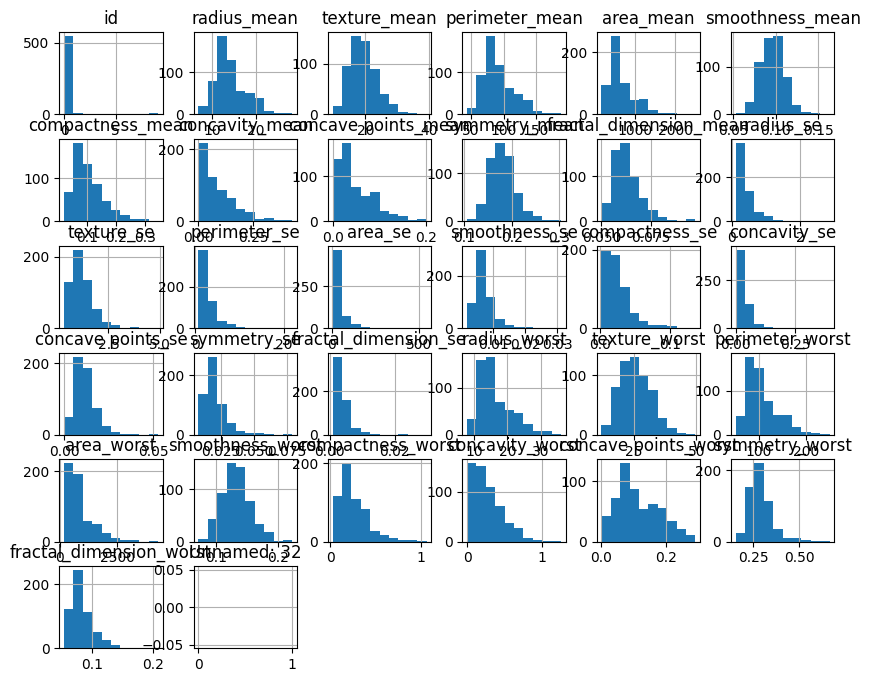

In [147]:
# hist
# numeric
numerical_col = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_col].hist(bins=10, figsize=(10,8))

plt.show()

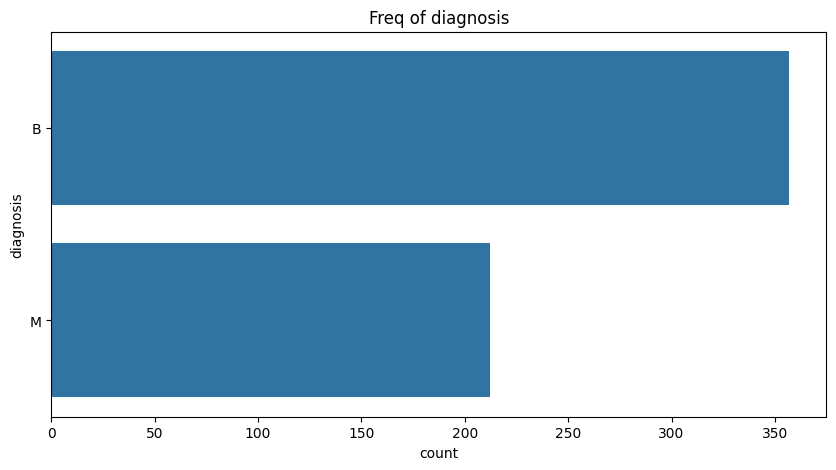

In [148]:
# categorical
categorical_col = data.select_dtypes(include='object').columns

for col in categorical_col:
    plt.figure(figsize=(10,5))

    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f'Freq of {col}')
    plt.show()

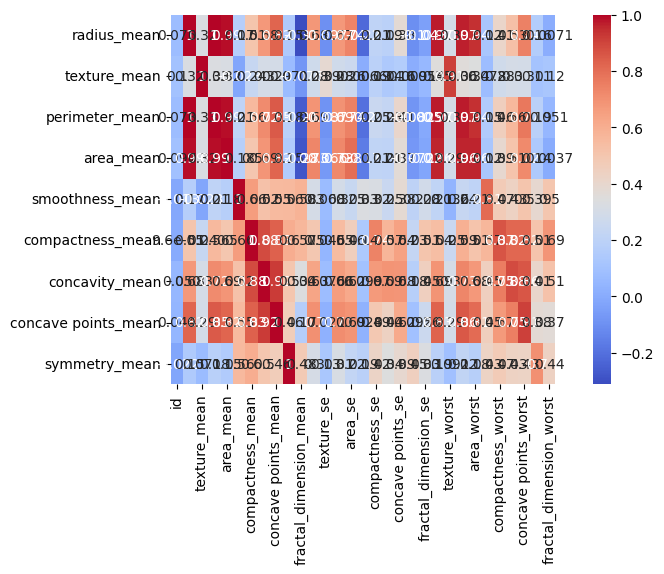

In [149]:
# correlation
corr_matrix = data[numerical_col].corr()[1:10]

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

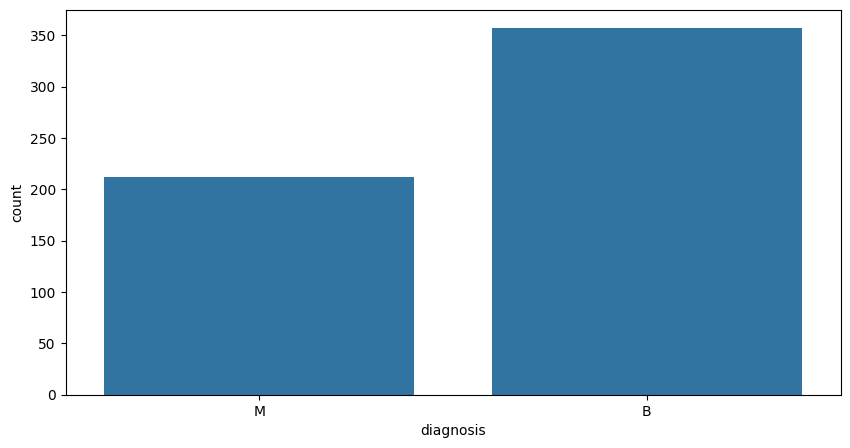

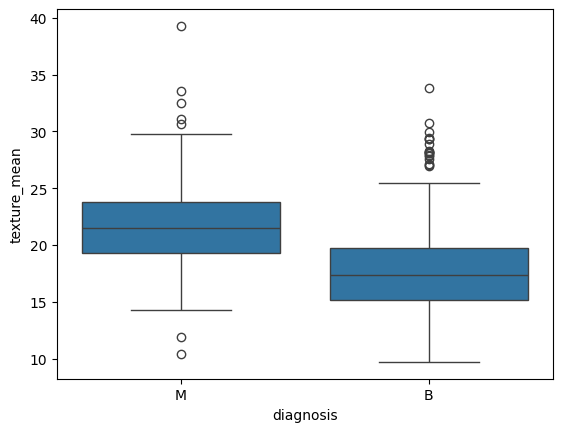

In [150]:
# analyzing output

plt.figure(figsize=(10,5))
sns.countplot(x=data['diagnosis'])
plt.show()

sns.boxplot(x='diagnosis', y='texture_mean', data=data)
plt.show()

### 3. preprocess

In [151]:
# missing value
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [152]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [153]:
data = data.drop(columns='Unnamed: 32')

data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [154]:
# numerical
x_num = data.select_dtypes(include=['float64', 'int64'])

data=data.fillna(x_num.mean())

In [155]:
# category
x_category = data.select_dtypes(include='object')
for col in x_category:
    mode_val = data[col].mode()[0]

    data[col] = data[col].fillna(mode_val)

In [156]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [157]:
# diag_encode                1.000000
# concave points_worst       0.793566
# perimeter_worst            0.782914
# concave points_mean        0.776614
# radius_worst               0.776454
# perimeter_mean             0.742636
# area_worst                 0.733825
# radius_mean                0.730029
# area_mean                  0.708984
# concavity_mean             0.696360
# concavity_worst            0.659610
# compactness_mean           0.596534
# compactness_worst          0.590998
# radius_se                  0.567134
# perimeter_se               0.556141
# area_se                    0.548236
# texture_worst              0.456903
# smoothness_worst           0.421465
# symmetry_worst             0.416294
# texture_mean               0.415185
# concave points_se          0.408042
# smoothness_mean            0.358560
# symmetry_mean              0.330499
# fractal_dimension_worst    0.323872
# compactness_se             0.292999
# concavity_se               0.253730
# fractal_dimension_se       0.077972
# id                         0.039769
# symmetry_se               -0.006522
# texture_se                -0.008303
# fractal_dimension_mean    -0.012838
# smoothness_se             -0.067016
# Name: diag_encode, dtype: float64

In [158]:
data=data.drop(columns=['id'])

### 4. split & scale

In [159]:
x = data.drop(columns='diagnosis')
y=data['diagnosis']

In [160]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [161]:
x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,0.3274,1.1940,1.885,17.67,0.009549,0.08606,0.303800,0.033220,0.04197,0.009559,10.31,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,0.6298,0.7629,4.414,81.46,0.004253,0.04759,0.038720,0.015670,0.01798,0.005295,26.68,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,0.4098,2.2650,2.608,23.52,0.008738,0.03938,0.043120,0.015600,0.04192,0.005822,10.01,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,0.2497,1.4930,1.497,16.64,0.007189,0.01035,0.010810,0.006245,0.02158,0.002619,12.25,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,0.5158,1.4410,3.312,34.62,0.007514,0.01099,0.007665,0.008193,0.04183,0.005953,11.02,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020


array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>],
       [<Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>],
       [<Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>,
        <Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'center': 'symmetry_se'}>,
        <Axes: title={'ce

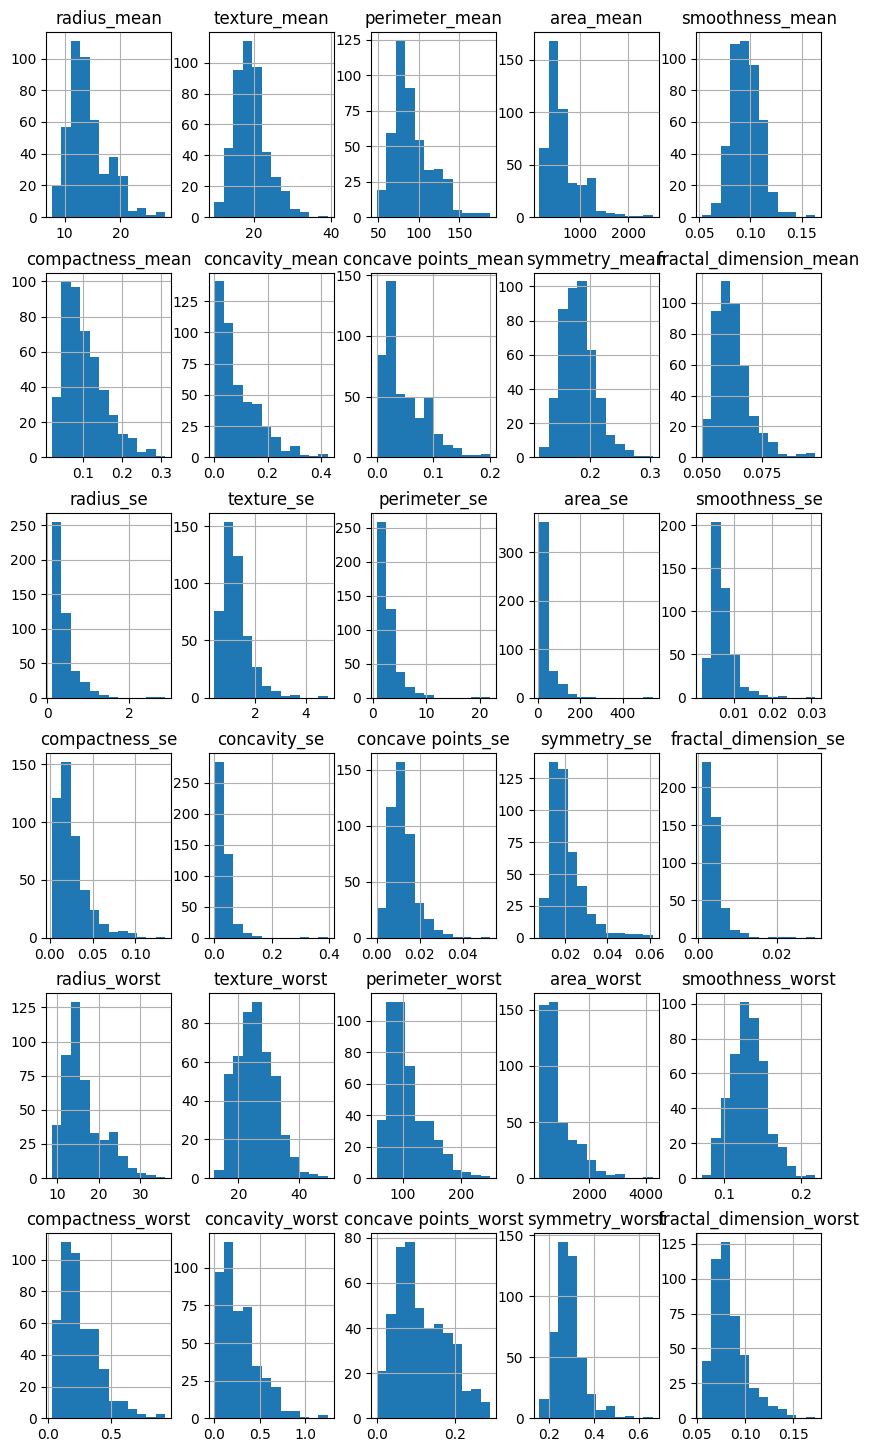

In [162]:
x_train.hist(bins=12, figsize=(10,18))

In [163]:
le = LabelEncoder()
std = StandardScaler()
mm = MinMaxScaler()

In [164]:
# labelling categorical
x_train.select_dtypes(include='object').columns

Index([], dtype='object')

In [165]:
x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,0.3274,1.1940,1.885,17.67,0.009549,0.08606,0.303800,0.033220,0.04197,0.009559,10.31,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,0.6298,0.7629,4.414,81.46,0.004253,0.04759,0.038720,0.015670,0.01798,0.005295,26.68,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,0.4098,2.2650,2.608,23.52,0.008738,0.03938,0.043120,0.015600,0.04192,0.005822,10.01,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,0.2497,1.4930,1.497,16.64,0.007189,0.01035,0.010810,0.006245,0.02158,0.002619,12.25,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,0.5158,1.4410,3.312,34.62,0.007514,0.01099,0.007665,0.008193,0.04183,0.005953,11.02,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020


In [166]:
x_train.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [167]:
# bell curve - std
bell =['radius_mean', 'texture_mean', 'perimeter_mean', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean','smoothness_worst' ]

for col in bell:
    x_train[col] = std.fit_transform(x_train[[col]])
    x_test[col] = std.transform(x_test[[col]])

x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,-1.440753,-0.435319,-1.362085,250.5,0.780573,0.14130,0.31300,0.04375,1.092662,2.458173,0.3274,1.1940,1.885,17.67,0.009549,0.08606,0.303800,0.033220,0.04197,0.009559,10.31,22.65,65.50,324.7,0.722894,0.43650,1.25200,0.17500,0.4228,0.11750
181,1.974096,1.733026,2.091672,1311.0,1.319843,0.28320,0.24870,0.14960,2.127004,1.558396,0.6298,0.7629,4.414,81.46,0.004253,0.04759,0.038720,0.015670,0.01798,0.005295,26.68,33.48,176.50,2089.0,0.761928,0.75840,0.67800,0.29030,0.4098,0.12840
63,-1.399982,-1.249622,-1.345209,260.9,-1.332645,0.08751,0.05988,0.02180,1.930333,0.954379,0.4098,2.2650,2.608,23.52,0.008738,0.03938,0.043120,0.015600,0.04192,0.005822,10.01,19.23,65.59,310.1,-1.438693,0.16780,0.13970,0.05087,0.3282,0.08490
248,-0.981797,1.416222,-0.982587,347.0,0.059390,0.07234,0.02379,0.01615,0.313264,0.074041,0.2497,1.4930,1.497,16.64,0.007189,0.01035,0.010810,0.006245,0.02158,0.002619,12.25,35.19,77.98,455.7,0.796624,0.13980,0.11250,0.06136,0.3409,0.08147
60,-1.117700,-1.010259,-1.125002,311.9,1.269511,0.08061,0.01084,0.01290,3.394436,0.950213,0.5158,1.4410,3.312,34.62,0.007514,0.01099,0.007665,0.008193,0.04183,0.005953,11.02,17.45,69.86,368.6,-0.174876,0.09866,0.02168,0.02579,0.3557,0.08020


In [168]:
# minmax

kolom = ['area_mean', 'perimeter_se', 'area_se', 'texture_worst', 'perimeter_worst',	'area_worst']

for col in kolom:
    x_train[col] = mm.fit_transform(x_train[[col]])
    x_test[col] = mm.transform(x_test[[col]])

x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,-1.440753,-0.435319,-1.362085,0.034369,0.780573,0.14130,0.31300,0.04375,1.092662,2.458173,0.3274,1.1940,0.053150,0.020299,0.009549,0.08606,0.303800,0.033220,0.04197,0.009559,10.31,0.283316,0.055971,0.025084,0.722894,0.43650,1.25200,0.17500,0.4228,0.11750
181,1.974096,1.733026,2.091672,0.489402,1.319843,0.28320,0.24870,0.14960,2.127004,1.558396,0.6298,0.7629,0.172313,0.139444,0.004253,0.04759,0.038720,0.015670,0.01798,0.005295,26.68,0.571962,0.620253,0.462832,0.761928,0.75840,0.67800,0.29030,0.4098,0.12840
63,-1.399982,-1.249622,-1.345209,0.038831,-1.332645,0.08751,0.05988,0.02180,1.930333,0.954379,0.4098,2.2650,0.087217,0.031225,0.008738,0.03938,0.043120,0.015600,0.04192,0.005822,10.01,0.192164,0.056428,0.021462,-1.438693,0.16780,0.13970,0.05087,0.3282,0.08490
248,-0.981797,1.416222,-0.982587,0.075774,0.059390,0.07234,0.02379,0.01615,0.313264,0.074041,0.2497,1.4930,0.034868,0.018375,0.007189,0.01035,0.010810,0.006245,0.02158,0.002619,12.25,0.617537,0.119414,0.057587,0.796624,0.13980,0.11250,0.06136,0.3409,0.08147
60,-1.117700,-1.010259,-1.125002,0.060714,1.269511,0.08061,0.01084,0.01290,3.394436,0.950213,0.5158,1.4410,0.120388,0.051958,0.007514,0.01099,0.007665,0.008193,0.04183,0.005953,11.02,0.144723,0.078135,0.035977,-0.174876,0.09866,0.02168,0.02579,0.3557,0.08020


In [169]:
y_train

68     B
181    M
63     B
248    B
60     B
      ..
71     B
106    B
270    B
435    M
102    B
Name: diagnosis, Length: 455, dtype: object

In [170]:
y_train= le.fit_transform(y_train)
y_test = le.transform(y_test)

y_train

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [171]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [172]:
data['diag_encode'] = le.fit_transform(data['diagnosis'])



In [173]:
data['diag_encode']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diag_encode, Length: 569, dtype: int64

In [174]:
print(data['diagnosis'].unique())

['M' 'B']


In [175]:
data = data.select_dtypes(include=['float64', 'int64'])  # Hanya gunakan kolom numerik
corr_target = data.corr()['diag_encode'].sort_values(ascending=False)

print(corr_target)

diag_encode                1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

In [176]:
top10 = data.corr()['diag_encode'].sort_values(ascending=False)[1:11]

top10


concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: diag_encode, dtype: float64

In [177]:
x=data[top10.index]

In [178]:
print(x_train.shape)
print(y_train.shape)

(455, 30)
(455,)


### 5. model & eval

In [179]:
LR = LogisticRegression()
NB = GaussianNB()

In [180]:
LR.fit(x_train, y_train)

c:\Users\graze\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [181]:
NB.fit(x_train, y_train)

GaussianNB()

In [182]:
# predict
y_predLR=LR.predict(x_test)
y_predNB = NB.predict(x_test)


In [183]:
print(accuracy_score(y_test, y_predLR))
print(accuracy_score(y_test, y_predNB))

0.9912280701754386
0.9649122807017544


In [184]:
reportLR = classification_report(y_test, y_predLR)
print(reportLR)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [185]:
reportNB = classification_report(y_test, y_predNB)
print(reportNB)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

